In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

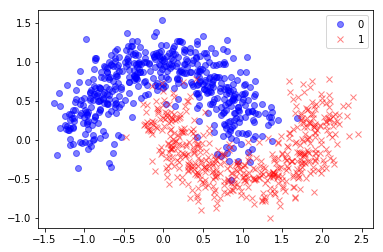

In [4]:
from sklearn.datasets import make_moons

X,y=make_moons(n_samples=1000,noise=0.2,random_state=0)
plt.plot(X[y==0,0],X[y==0,1],"ob",alpha=0.5)
plt.plot(X[y==1,0],X[y==1,1],"xr",alpha=0.5)
plt.legend(["0","1"])

In [5]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam



In [9]:
model=Sequential()
model.add(Dense(1,input_shape=(2,),activation="sigmoid"))
model.compile(Adam(lr=0.005),"binary_crossentropy",metrics=["accuracy"])


W0717 16:52:30.095789 139950701471616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 16:52:30.145804 139950701471616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 16:52:30.155718 139950701471616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 16:52:30.191800 139950701471616 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 16:52:30.200067 139950701471616 deprecation_wrappe

In [0]:
model.fit(X_train,y_train,epochs=100,verbose=2)

In [11]:
results=model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 127us/step


In [12]:
results[1]

0.8366666666666667

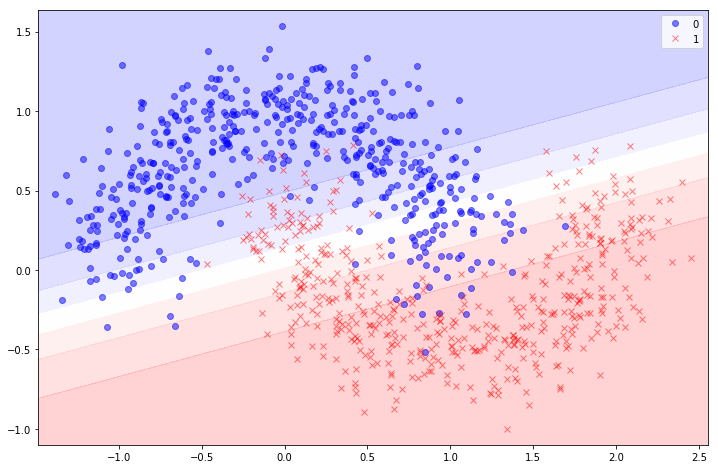

In [15]:
def plot_decision_boundary(model,X,y):
  amin,bmin=X.min(axis=0)-0.1
  amax,bmax=X.max(axis=0)+0.1
  hticks=np.linspace(amin,amax,101)
  vticks=np.linspace(bmin,bmax,101)
  
  
  aa,bb=np.meshgrid(hticks,vticks)
  ab=np.c_[aa.ravel(),bb.ravel()]
  
  
  c=model.predict(ab)
  cc=c.reshape(aa.shape)
  
  
  
  
  plt.figure(figsize=(12,8))
  plt.contourf(aa,bb,cc,cmap="bwr",alpha=0.2)
  plt.plot(X[y==0,0],X[y==0,1],"ob",alpha=0.5)
  plt.plot(X[y==1,0],X[y==1,1],"xr",alpha=0.5)
  plt.legend(["0","1"])
  
  
  
plot_decision_boundary(model,X,y)
  
  
  
  
  

In [0]:
model=Sequential()
model.add(Dense(4,input_shape=(2,),activation="tanh"))
model.add(Dense(2,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
model.compile(Adam(lr=0.005),"binary_crossentropy",metrics=["accuracy"])

In [17]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [18]:
model.evaluate(X_test,y_test)

300/300 [==============================] - 0s 205us/step


[0.10206707930813233, 0.9566666666666667]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_train_pred=model.predict_classes(X_train)
y_test_pred=model.predict_classes(X_test)

In [24]:
accuracy_score(y_train,y_train_pred)

0.9657142857142857

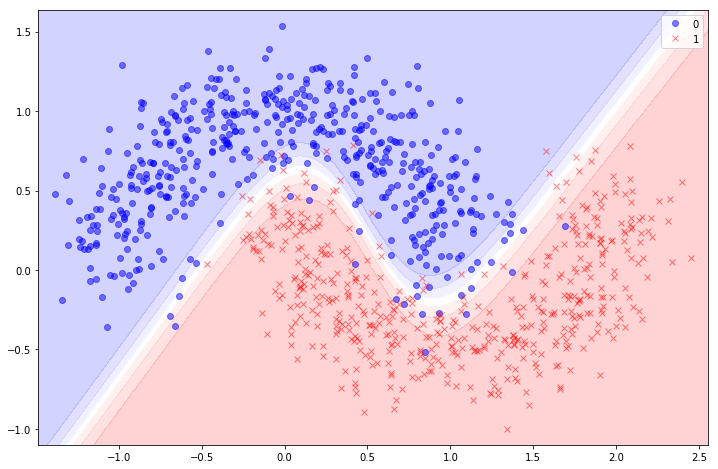

In [25]:
plot_decision_boundary(model,X,y)